In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
df = pd.read_csv('exercicio_imoveis.csv', engine='python', sep=';', decimal=",")
df

,area,valor
0,128,9626.80
1,114,6754.39
2,73,5753.42
3,92,6141.30
4,96,9052.08
5,91,7582.42
6,107,8224.30
7,83,8012.05
8,97,8402.06
9,112,7946.43


In [ ]:
# Separar as colunas A e B em variáveis independentes (X) e dependente (y)
X = df['area'].values.reshape(-1, 1)
y = df['valor']

In [ ]:
# Instanciar um objeto do tipo LinearRegression e ajustá-lo aos dados
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

Text(0, 0.5, 'valor')

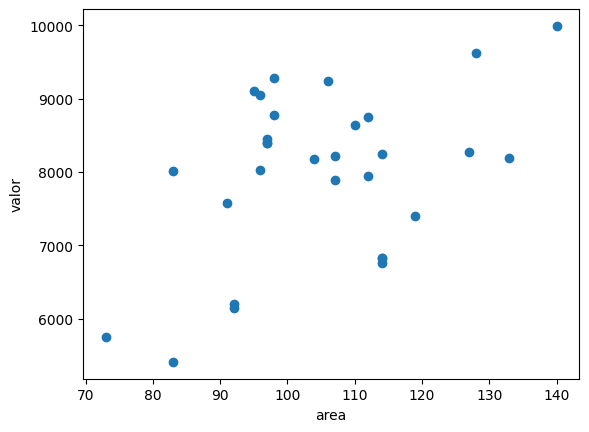

In [ ]:
# Plotando um gráfico para visualização da distribuição
plt.scatter(x=X, y=y)
plt.xlabel("area")
plt.ylabel("valor")

In [ ]:
# Coeficiente linear da reta
a = reg.coef_[0]
b = reg.intercept_
y_pred = a * X + b

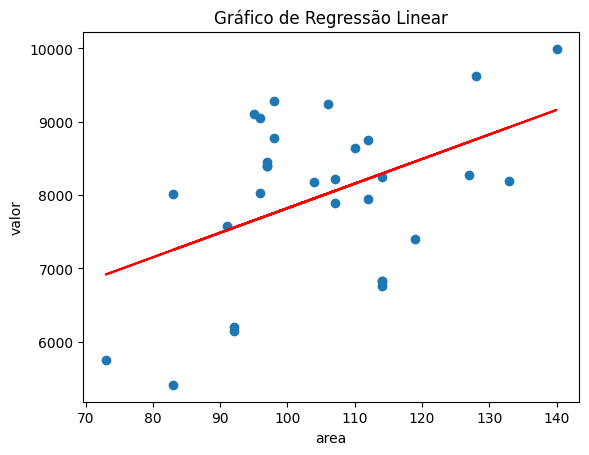

In [ ]:
# Plotando a reta no gráfico
plt.scatter(x=X,y=y)
plt.xlabel('area')
plt.ylabel('valor')
plt.plot(X, y_pred, color="red")
plt.title('Gráfico de Regressão Linear')
plt.show()

In [ ]:
# Cálculos do coeficiente a e b
print('Coeficiente:', a)
print('Intercepto:', b)

Coeficiente: 33.510958837844115
Intercepto: 4469.424353987628


In [ ]:
# Coeficiente R²
print("R²:", reg.score(X, y))

R²: 0.2006778341299611


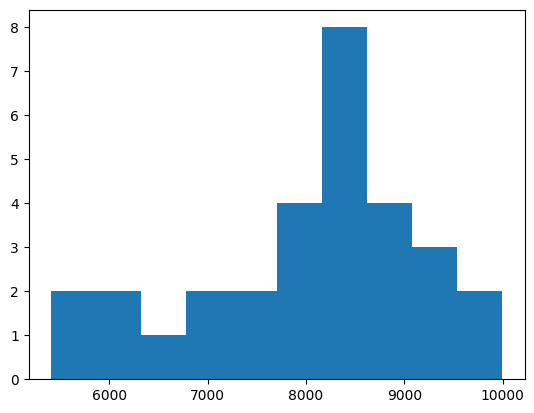

In [ ]:
plt.hist(df['valor'])
plt.show()

In [ ]:
media_valor = df['valor'].mean()
media_valor

7986.957999999999

In [ ]:
# desvio padrão
desvio_valor = df['valor'].std()
desvio_valor

1141.5250751981785

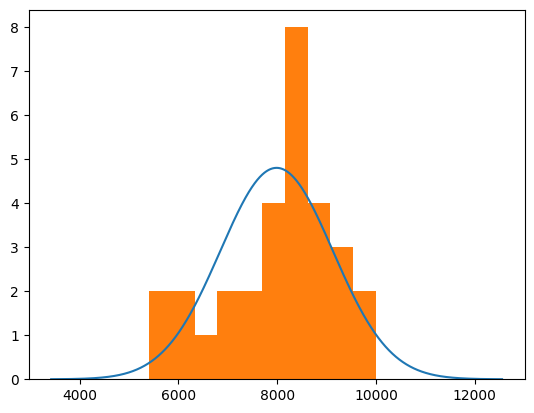

In [ ]:
x= np.arange(media_valor-4*desvio_valor,media_valor+4*desvio_valor,0.001)
y = norm.pdf(x,media_valor,desvio_valor)

N = len(df)
num_separacoes = 10
largura_separacoes = (df['valor'].max() - df['valor'].min()) / num_separacoes
plt.plot(x, y* N * largura_separacoes)

plt.hist(df['valor'],num_separacoes)
plt.show()

In [ ]:
li_80 = media_valor-1.28*desvio_valor
ls_80 = media_valor+1.28*desvio_valor

li_90 = media_valor-1.64*desvio_valor
ls_90 = media_valor+1.64*desvio_valor

li_95 = media_valor-1.96*desvio_valor
ls_95 = media_valor+1.96*desvio_valor

li_1 = media_valor-desvio_valor
ls_1 = media_valor+desvio_valor

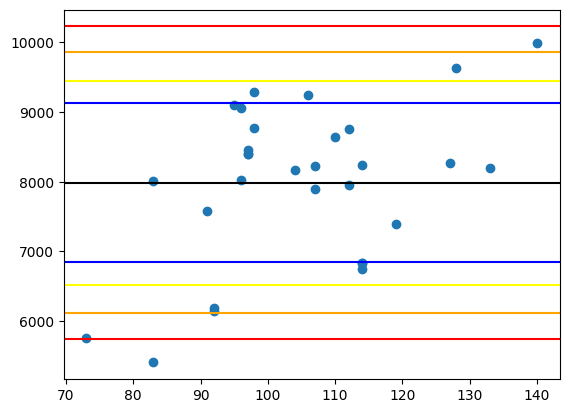

In [ ]:
# Plotando o gráfico demonstrando as linhas de desvio padrão 1.28, 1.64, 1.96
plt.scatter(df['area'],df['valor'])
plt.axhline(media_valor,color = 'black')
plt.axhline(li_1, color = 'blue')
plt.axhline(ls_1, color = 'blue')
plt.axhline(li_80, color = 'yellow')
plt.axhline(ls_80, color = 'yellow')
plt.axhline(li_90, color = 'orange')
plt.axhline(ls_90, color = 'orange')
plt.axhline(li_95, color = 'red')
plt.axhline(ls_95, color = 'red')
plt.show()

In [ ]:
# Conferindo o limite dos valores
df.shape

(30, 2)

In [ ]:
# Removendo todos os valores acima do limite de 1 do desvio padrão
dfFiltro = df[(df['valor'] >= li_1) & (df['valor'] <= ls_1)]

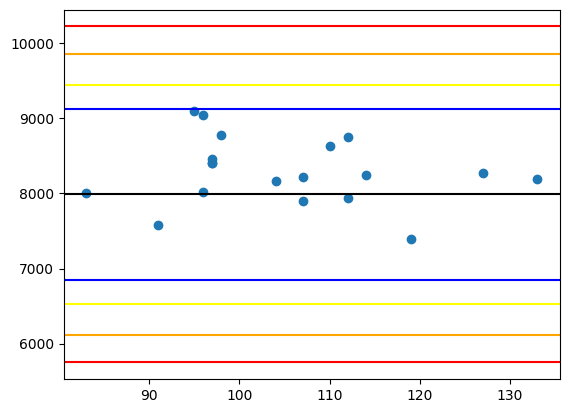

In [ ]:
plt.scatter(dfFiltro['area'],dfFiltro['valor'])
plt.axhline(media_valor,color = 'black')
plt.axhline(li_1, color = 'blue')
plt.axhline(ls_1, color = 'blue')
plt.axhline(li_80, color = 'yellow')
plt.axhline(ls_80, color = 'yellow')
plt.axhline(li_90, color = 'orange')
plt.axhline(ls_90, color = 'orange')
plt.axhline(li_95, color = 'red')
plt.axhline(ls_95, color = 'red')
plt.show()

In [ ]:
mediaValorFiltro = dfFiltro['valor'].mean()
mediaValorFiltro

8291.422631578947

In [ ]:
desvioValorFiltro = dfFiltro['valor'].std()
desvioValorFiltro

448.31396430083964

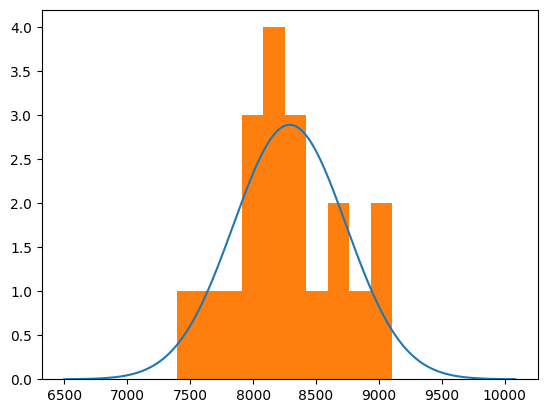

In [ ]:
x= np.arange(mediaValorFiltro-4*desvioValorFiltro,mediaValorFiltro+4*desvioValorFiltro,0.001)
y = norm.pdf(x,mediaValorFiltro,desvioValorFiltro)

N = len(dfFiltro)
num_separacoes = 10
largura_separacoes = (dfFiltro['valor'].max() - dfFiltro['valor'].min()) / num_separacoes
plt.plot(x, y* N * largura_separacoes)

plt.hist(dfFiltro['valor'],num_separacoes)
plt.show()

Após a remoção dos valores acima de 1 do desvio padrão, a distribuição consegue apresentar uma maior normalidade